In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [2]:
run = pd.read_csv('data_output/yco0.0P100/run1.csv')
run.head()

,ycf,Pf,rhoco,rhome
0,0.0,91.589512,0.0,0.002286
1,0.0,103.106709,0.0,0.002463
2,0.0,106.182232,0.0,0.002560
3,0.0,107.816747,0.0,0.002543
4,0.0,104.162260,0.0,0.002460


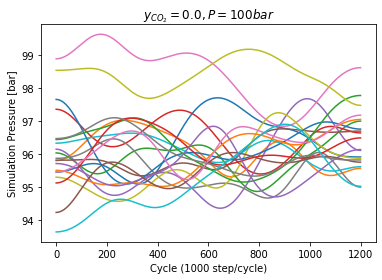

In [35]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.0P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 0.0, P = 100bar$")

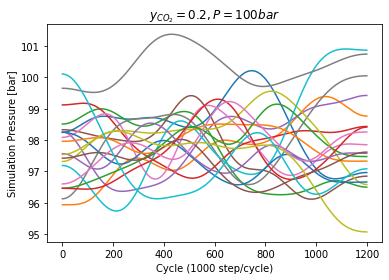

In [36]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.2P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 0.2, P = 100bar$")

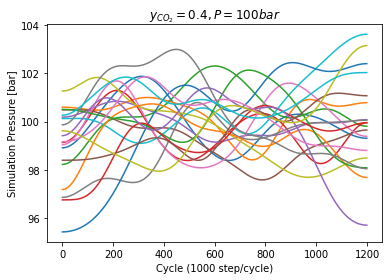

In [37]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.4P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 0.4, P = 100bar$")

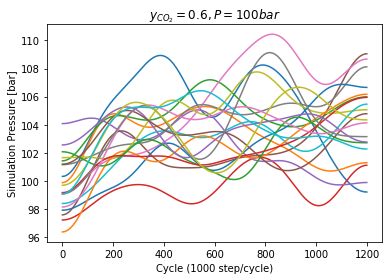

In [38]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.6P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 0.6, P = 100bar$")

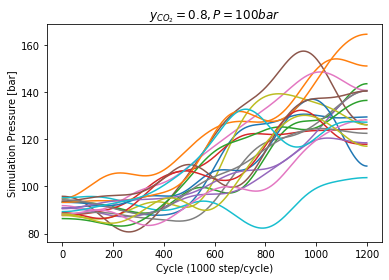

In [39]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.8P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 0.8, P = 100bar$")

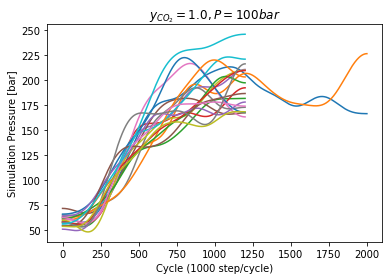

In [69]:
for i in range(20):
    run = pd.read_csv('data_output/yco1.0P100/run' + str(i) + '.csv')
    P_smooth = gaussian_filter1d( run.Pf, sigma = 100)
    plt.plot( P_smooth )
    plt.xlabel( "Cycle (1000 step/cycle)")
    plt.ylabel("Simulation Pressure [bar]")
    plt.title( r"$y_{CO_2} = 1.0, P = 100bar$")

In [23]:
def kappa(ohm):
    return 0.37464 + 1.5422*ohm - 0.26992*ohm**2

def alpha(kappa, Tc, T):
    return ( 1 + kappa*(1 - np.sqrt(T/Tc) ) )**2

def a( Tc, Pc, alpha, P_res, T ):
    R = .08314 #L*bar/mol/K
    return 0.45724*R**2*Tc**2*alpha/Pc

def A( a, P_res, T ):
    R = .08314 #L*bar/mol/K
    return a*P_res/R**2/T**2

def b( Tc, Pc ):
    R = .08314 #L*bar/mol/K
    return 0.07780*R*Tc/Pc

def B( b, P_res, T):
    R = .08314 #L*bar/mol/K
    return b*P_res/R/T

def solveZ( A, B ):
    c1 = B-1
    c2 = A - 3*B**2 - 2*B
    c3 = B**3 + B**2 - A*B
    roots = np.roots( [1, c1, c2, c3] )
    for r in roots:
        if( r.imag == 0):
            return( r.real )
    else:
        stop()
        
        
def Fi( Aii, Ajj, Aij, A_mix, Bi, B_mix, Z_mix, yi, P_res ):
    term1 = Bi*(Z_mix - 1)/B_mix
    term2 = np.log( Z_mix - B_mix )
    term3 = A_mix/( 2*np.sqrt(2)*B_mix )
    term4 = 2*( yi*Aii + (1-yi)*Aij )/A_mix - Bi/B_mix
    term5 = (Z_mix + (1 + np.sqrt(2))*B_mix )/(Z_mix + (1 - np.sqrt(2))*B_mix )
    term6 = term1 - term2 - term3*term4*np.log( term5 )
    return yi*P_res*np.exp( term6 )

def Fone( Z, A, B, P_res):
    term1 = Z - 1 - np.log( Z - B)
    term2 = A/( 2*np.sqrt(2)*B )
    term3 = (Z + (1 + np.sqrt(2))*B )/(Z + (1 - np.sqrt(2))*B )
    term4 = term1 - term2*np.log( term3 )
    return np.exp( term4 )*P_res

def PR_Fugacity( P_res, T, yco):
    Tc_co = 304.2 #K
    Tc_me = 190.6 #K
    Pc_co = 73.76 #bar
    Pc_me = 46 #bar
    ohm_co = 0.225
    ohm_me = 0.008
    
    kappa_me = kappa( ohm_me )
    alpha_me = alpha( kappa_me, Tc_me, T)
    a_me = a( Tc_me, Pc_me, alpha_me, P_res, T )
    A_me = A( a_me, P_res, T )
    b_me = b( Tc_me, Pc_me )
    B_me = B( b_me, P_res, T)

    kappa_co = kappa( ohm_co )
    alpha_co = alpha( kappa_co, Tc_co, T)
    a_co = a( Tc_co, Pc_co, alpha_co, P_res, T )
    A_co = A( a_co, P_res, T )
    b_co = b( Tc_co, Pc_co )
    B_co = B( b_co, P_res, T)
    
    a_cm = np.sqrt(a_me*a_co )*(1-0.0919)
    A_cm = A( a_cm, P_res, T)

    a_mix = yco*yco*a_co + 2*yco*(1-yco)*a_cm + (1-yco)*(1-yco)*a_me
    b_mix = yco*b_co + (1-yco)*b_me

    A_mix = A( a_mix, P_res, T )
    B_mix = B( b_mix, P_res, T )
    Z_mix = solveZ( A_mix, B_mix )
    
    F_me = Fi( A_me, A_co, A_cm, A_mix, B_me, B_mix, Z_mix, 1-yco, P_res)
    F_co = Fi( A_co, A_me, A_cm, A_mix, B_co, B_mix, Z_mix, yco, P_res)
    
    return F_co, F_me

def PR_Fugacity_Single( P_res, T, species):
    Tc_co = 304.2 #K
    Tc_me = 190.6 #K
    Pc_co = 73.76 #bar
    Pc_me = 46 #bar
    ohm_co = 0.225
    ohm_me = 0.008
    
    if (species == "co"):
        kappa_co = kappa( ohm_co )
        alpha_co = alpha( kappa_co, Tc_co, T)
        a_co = a( Tc_co, Pc_co, alpha_co, P_res, T )
        A_co = A( a_co, P_res, T )
        b_co = b( Tc_co, Pc_co )
        B_co = B( b_co, P_res, T)
        Z_co = solveZ( A_co, B_co )
        return Fone( Z_co, A_co, B_co, P_res )
        
    elif (species == "me"):
        kappa_me = kappa( ohm_me )
        alpha_me = alpha( kappa_me, Tc_me, T)
        a_me = a( Tc_me, Pc_me, alpha_me, P_res, T )
        A_me = A( a_me, P_res, T )
        b_me = b( Tc_me, Pc_me )
        B_me = B( b_me, P_res, T)
        Z_me = solveZ( A_me, B_me )
        return Fone( Z_me, A_me, B_me, P_res )
    
    else:
        stop("unknown species")

In [25]:
P_res = 100 #[bar]
T = 45 + 273.15 #K
yco = 1.0
fco, fme = PR_Fugacity( P_res, T, yco )
print( fco )
print( fme )

59.417054924397775
0.0


Text(0.5, 1.0, 'Fugacy of Pure $CO_2$')

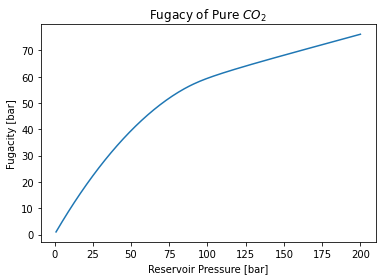

In [34]:
f = np.zeros( 200 )
P = np.arange( 200 ) + 1
for pi in P:
    f[pi - 1], _ = PR_Fugacity( pi, T, yco)
    
plt.plot( P, f )
plt.xlabel( "Reservoir Pressure [bar]")
plt.ylabel( "Fugacity [bar]")
plt.title( "Fugacy of Pure $CO_2$")

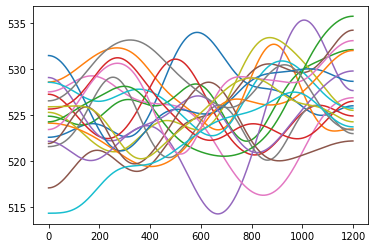

In [55]:
for i in range(20):
    run = pd.read_csv('data_output/yco0.0P100/run' + str(i) + '.csv')
    rho_smooth = gaussian_filter1d( run.rhome*60**3, sigma = 100)
    plt.plot( rho_smooth )

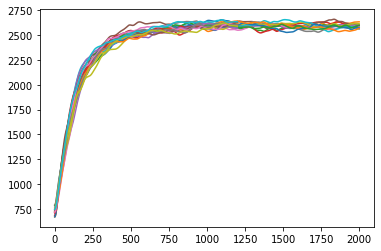

In [6]:
for i in range(20):
    run = pd.read_csv('data_output/yco1.0P100/run' + str(i) + '.csv')
    rho_smooth = gaussian_filter1d( run.rhoco*60**3, sigma = 10)
    plt.plot( rho_smooth )

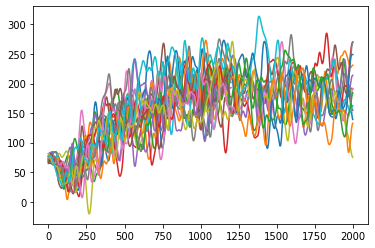

In [5]:
for i in range(20):
    run = pd.read_csv('data_output/yco1.0P100/run' + str(i) + '.csv')
    rho_smooth = gaussian_filter1d( run.Pf, sigma = 10)
    plt.plot( rho_smooth )

In [4]:
exp_data = pd.read_csv("../c02.txt", sep='\t')
volume = 2.16e-22
exp_data['particles'] = exp_data['Density (mol/l)']*( 6.02*10**(23) )*volume

In [64]:
exp_data[ exp_data["Pressure (bar)"] == 100 ]

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,particles
21,318.15,100.0,11.321,0.088328,14.443,15.326,64.595,46.891,355.66,224.75,0.42984,36.032,0.064793,supercritical,1472.092272


In [65]:
exp_data = pd.read_csv("../ch4.txt", sep='\t')
volume = 2.16e-22
exp_data['particles'] = exp_data['Density (mol/l)']*( 6.02*10**(23) )*volume

In [66]:
exp_data[ exp_data["Pressure (bar)"] == 100 ]

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,particles
21,318.15,100.0,4.2531,0.23513,11.581,13.932,67.907,29.433,46.304,461.16,0.29107,14.141,0.045996,supercritical,553.039099
